In [1]:
import numpy as np
import pandas as pd
import os

In [3]:
df = pd.read_csv('WELFake_Dataset.csv')
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [4]:
df.drop("Unnamed: 0", axis = 1)
df.dropna(inplace = True)

In [5]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


In [6]:
#removing other than alphates and digits
import re
df['title'] = df['title'].str.replace(r"[^\w\s]", "").str.replace(r"\d", "")
df['text'] = df['text'].str.replace(r"[^\w\s]","").str.replace(r"\d", "")
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


nltk.download('stopwords')
nltk.download('punkt')

# Function to tokenize and remove stopwords from text
def tokenize_and_remove_stopwords(text):
    # Convert the text to lowercase to ensure consistency
    text = text.lower()

    # Get the set of English stopwords from NLTK
    stop_words = set(stopwords.words('english'))

    # Tokenize the text into words
    tokens = word_tokenize(text)

    # Remove stopwords from the list of tokens
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Reconstruct the text by joining the remaining tokens
    filtered_text = " ".join(filtered_tokens)

    return filtered_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [8]:
import nltk
nltk.download('punkt_tab')
df['title'] = df['title'].apply(tokenize_and_remove_stopwords)
df['text'] = df['text'].apply(tokenize_and_remove_stopwords)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [9]:
df.head()

,Unnamed: 0,title,text,label
0,0,law enforcement high alert following threats c...,comment expected barack obama members # fyf911...,1
2,2,unbelievable ! obama ’ attorney general says c...,", demonstrators gathered last night exercising...",1
3,3,"bobby jindal , raised hindu , uses story chris...",dozen politically active pastors came private ...,0
4,4,satan 2 : russia unvelis image terrifying new ...,"rs-28 sarmat missile , dubbed satan 2 , replac...",1
5,5,time ! christian group sues amazon splc design...,say one time someone sued southern poverty law...,1


In [10]:
X = df['title'] + df['text']
y = df['label']

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 1000)
tf_idf_matrix_h = tfidf.fit_transform(df['title'])
tf_idf_matrix_text = tfidf.fit_transform(df['text'])
title = tf_idf_matrix_h.toarray()
text = tf_idf_matrix_text.toarray()

In [12]:
a = []
for i in title:
    a.append(i)
print(a[1])
df['tf_title'] = a

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.3520546
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.  

In [13]:
b = []
for i in text:
    b.append(i)
print(b[1])
df['tf_text'] = b

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [14]:
df['label'].shape

(71537,)

In [15]:
import numpy as np
title = np.vstack(df['tf_title'].values)
text = np.vstack(df['tf_text'].values)
X = np.concatenate((title,text),axis = 1)
y = df['label']
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42, stratify = y)

In [16]:
print(y.shape)

(71537,)


In [17]:
y_train.shape

(57229,)

In [18]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, f1_score
import matplotlib.pyplot as plt

model_results = []

def evaluate_and_report(model_name, model, X_test, y_test, results_list=model_results):
    """Train/test helper that logs metrics and prints a standard report."""
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    results_list.append(
        {
            'model': model_name,
            'accuracy': accuracy,
            'macro_f1': macro_f1,
        }
    )
    print(f"{model_name} Accuracy: {accuracy:.3f}")
    print(classification_report(y_test, y_pred))


def plot_model_performance(results, metrics=('accuracy', 'macro_f1')):
    """Visualize stored model metrics as grouped bar charts."""
    if not results:
        raise ValueError('No model results to visualize. Run evaluate_and_report first.')

    available = [metric for metric in metrics if metric in results[0]]
    if not available:
        raise ValueError('Requested metrics are not available in the results.')

    model_names = [entry['model'] for entry in results]
    offsets = np.arange(len(model_names))
    width = 0.8 / len(available)

    plt.figure(figsize=(12, 6))
    ax = plt.gca()

    for idx, metric in enumerate(available):
        values = [entry[metric] for entry in results]
        shift = (idx - (len(available) - 1) / 2) * width
        bars = ax.bar(offsets + shift, values, width, label=metric.replace('_', ' ').title())
        for bar, value in zip(bars, values):
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                value + 0.005,
                f"{value:.3f}",
                ha='center',
                va='bottom',
                fontsize=9,
            )

    ax.set_xticks(offsets)
    ax.set_xticklabels(model_names, rotation=25, ha='right')
    ax.set_ylabel('Score')
    ax.set_ylim(0, 1.05)
    ax.set_title('Model Performance Comparison')
    ax.legend()
    plt.tight_layout()
    plt.show()


In [19]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
model_lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [20]:
evaluate_and_report("Logistic Regression", model_lr, X_test, y_test, model_results)

Logistic Regression Accuracy: 0.963
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      7006
           1       0.96      0.97      0.96      7302

    accuracy                           0.96     14308
   macro avg       0.96      0.96      0.96     14308
weighted avg       0.96      0.96      0.96     14308



In [21]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p=2)
model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [22]:
evaluate_and_report("KNN (k=2)", model_knn, X_test, y_test, model_results)

KNN (k=2) Accuracy: 0.774
              precision    recall  f1-score   support

           0       0.84      0.66      0.74      7006
           1       0.73      0.88      0.80      7302

    accuracy                           0.77     14308
   macro avg       0.79      0.77      0.77     14308
weighted avg       0.79      0.77      0.77     14308



In [23]:
from sklearn.svm import SVC
model_svm = SVC(kernel = 'linear', random_state = 0)
model_svm.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [24]:
evaluate_and_report("Linear SVM", model_svm, X_test, y_test, model_results)

Linear SVM Accuracy: 0.965
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      7006
           1       0.96      0.97      0.97      7302

    accuracy                           0.96     14308
   macro avg       0.97      0.96      0.96     14308
weighted avg       0.96      0.96      0.96     14308



In [25]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
evaluate_and_report("Gaussian NB", model_nb, X_test, y_test, model_results)

Gaussian NB Accuracy: 0.857
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      7006
           1       0.87      0.85      0.86      7302

    accuracy                           0.86     14308
   macro avg       0.86      0.86      0.86     14308
weighted avg       0.86      0.86      0.86     14308



In [26]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
model_dt.fit(X_train, y_train)
evaluate_and_report("Decision Tree", model_dt, X_test, y_test, model_results)

Decision Tree Accuracy: 0.949
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      7006
           1       0.94      0.96      0.95      7302

    accuracy                           0.95     14308
   macro avg       0.95      0.95      0.95     14308
weighted avg       0.95      0.95      0.95     14308



In [27]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=50, random_state=42)
model_rf.fit(X_train, y_train)
evaluate_and_report("Random Forest (n=50)", model_rf, X_test, y_test, model_results)

Random Forest (n=50) Accuracy: 0.966
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      7006
           1       0.96      0.98      0.97      7302

    accuracy                           0.97     14308
   macro avg       0.97      0.97      0.97     14308
weighted avg       0.97      0.97      0.97     14308



In [29]:
pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   - -------------------------------------- 1.8/72.0 MB 16.9 MB/s eta 0:00:05
   ----- ---------------------------------- 10.2/72.0 MB 35.5 MB/s eta 0:00:02
   ---------- ----------------------------- 18.1/72.0 MB 33.6 MB/s eta 0:00:02
   -------------- ------------------------- 26.2/72.0 MB 34.6 MB/s eta 0:00:02
   ------------------ --------------------- 33.6/72.0 MB 34.4 MB/s eta 0:00:02
   --------------------- ------------------ 39.6/72.0 MB 34.0 MB/s eta 0:00:01
   ------------------------- -------------- 45.9/72.0 MB 34.3 MB/s eta 0:00:01
   --------------------------- ------------ 49.8/72.0 MB 31.4 MB/s eta 0:00:01
   --------------------------------- ------ 59.5/72.0 MB 33.0 MB/s eta 0:00:01
   ------------------------------------- -- 67.6/72.0 MB 33.7 MB/s eta 0:00:01
   ---------------------------------------- 72.0/72.0 MB 32.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packag

In [30]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier(objective = "binary:logistic",
                             n_estimators = 50,
                             max_depth =3 ,
                             learning_rate = 0.1,
                             random_state = 42)
model_xgb.fit(X_train, y_train)
evaluate_and_report("XGBoost", model_xgb, X_test, y_test, model_results)

XGBoost Accuracy: 0.941
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      7006
           1       0.91      0.98      0.94      7302

    accuracy                           0.94     14308
   macro avg       0.94      0.94      0.94     14308
weighted avg       0.94      0.94      0.94     14308



In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_estimator = DecisionTreeClassifier(max_depth = 3)
model_ad = AdaBoostClassifier(estimator = base_estimator, n_estimators = 50, random_state = 42 )
model_ad.fit(X_train, y_train)
evaluate_and_report("AdaBoost", model_ad, X_test, y_test, model_results)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.962
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      7006
           1       0.96      0.97      0.96      7302

    accuracy                           0.96     14308
   macro avg       0.96      0.96      0.96     14308
weighted avg       0.96      0.96      0.96     14308



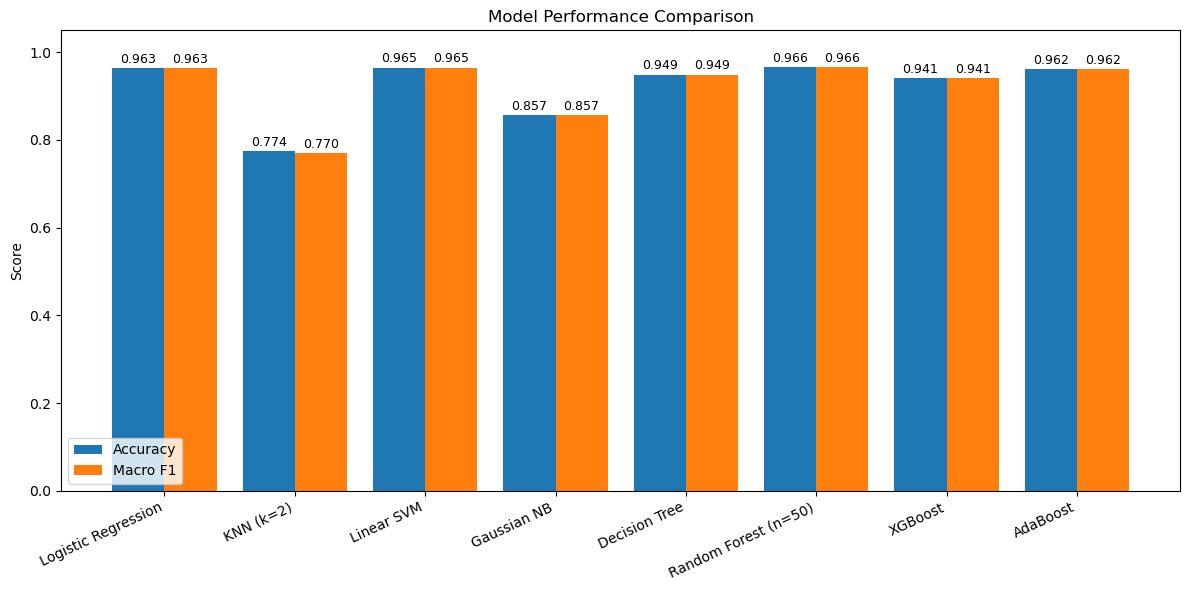

In [32]:
plot_model_performance(model_results)

In [33]:
!pip install shap

   ---------------------------------------- 0.0/549.3 kB ? eta -:--:--
   ---------------------------------------- 549.3/549.3 kB 6.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------- ----------------- 8.7/15.6 MB 41.3 MB/s eta 0:00:01
   ---------------------------------------  15.5/15.6 MB 37.4 MB/s eta 0:00:01
   ---------------------------------------- 15.6/15.6 MB 35.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.0.2 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.


In [34]:
import shap
shap.initjs()

In [35]:
background = shap.sample(X_train, 200, random_state=42)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine title and text into one field
combined_text = df['title'] + " " + df['text']

# Create vectorizer
tfidf = TfidfVectorizer(max_features=2000)

# TF-IDF features
X = tfidf.fit_transform(combined_text).toarray()
y = df['label']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Feature names for SHAP
feature_names = tfidf.get_feature_names_out()


In [37]:
# Use SHAP Explainer for linear models
explainer_lr = shap.Explainer(model_lr, X_train, feature_names=feature_names)

# SHAP values for test set
shap_values_lr = explainer_lr(X_test)

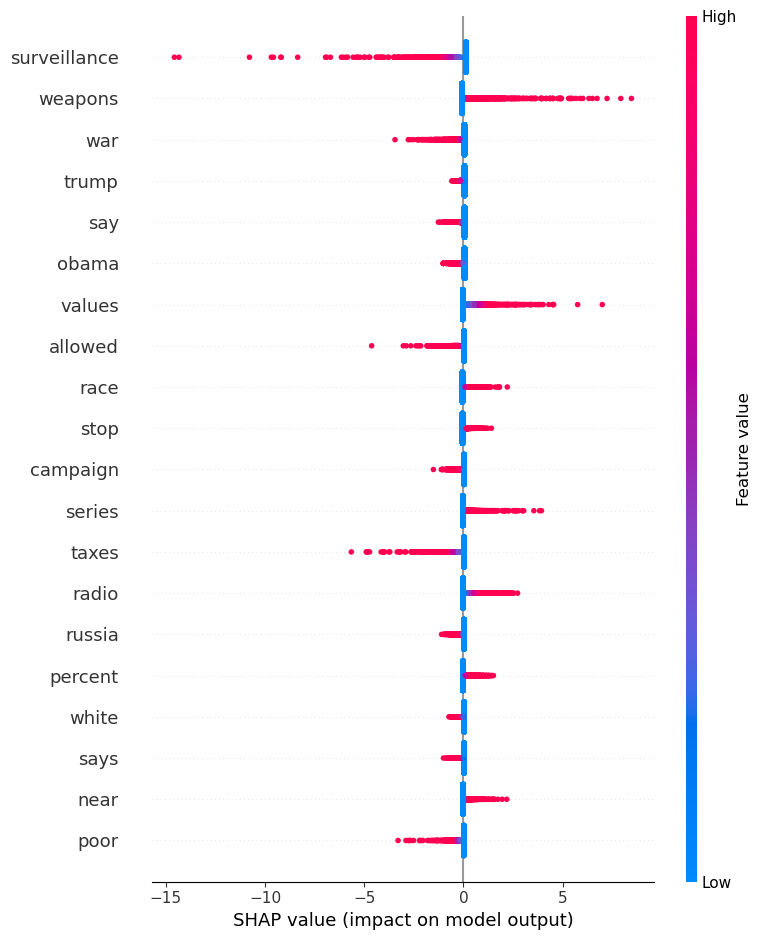

In [38]:
shap.summary_plot(
    shap_values_lr,
    X_test,
    feature_names=feature_names,
    plot_type="dot",
    max_display=20
)


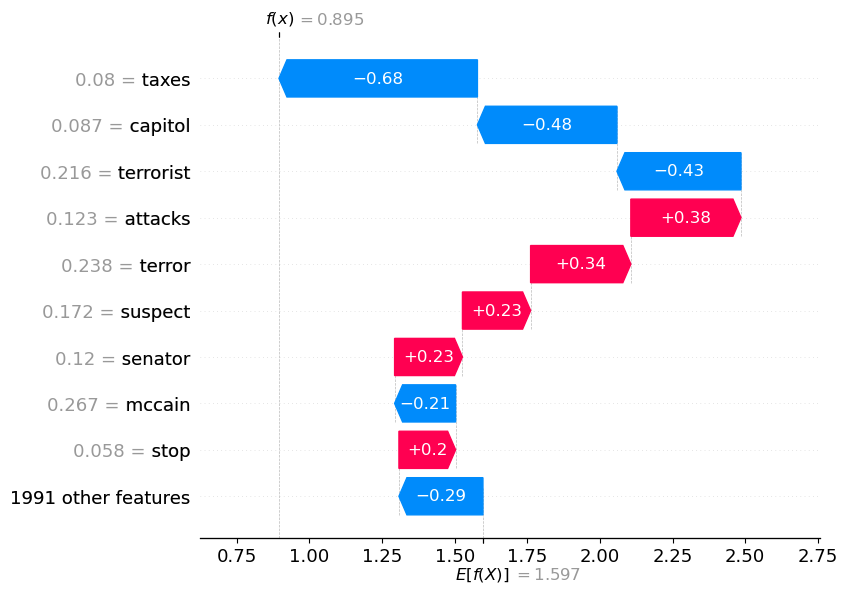

In [39]:
idx = 10  # choose any test sample

shap.waterfall_plot(
    shap.Explanation(
        values=shap_values_lr.values[idx],
        base_values=shap_values_lr.base_values[idx],
        data=X_test[idx],
        feature_names=feature_names
    )
)


In [41]:
# BLOCK 1 — FAST XGBOOST SHAP
import shap

# Background sample (much faster)
background = shap.sample(X_train, 200, random_state=42)

# Fast TreeExplainer
explainer_xgb = shap.TreeExplainer(
    model_xgb,
    data=background,
    feature_perturbation="interventional"   # safe for sparse TF-IDF
)

shap_values_xgb = explainer_xgb.shap_values(
    X_test,
    check_additivity=False   # BIG speedup
)

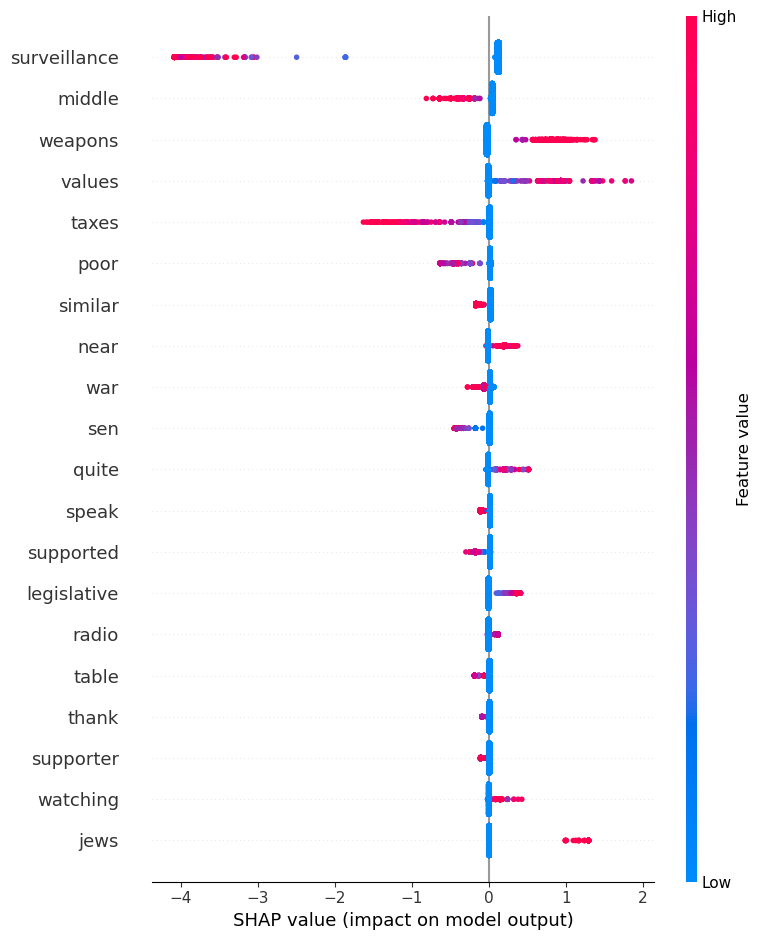

In [42]:
shap.summary_plot(
    shap_values_xgb,
    X_test,
    feature_names=feature_names,
    plot_type="dot",
    max_display=20
)

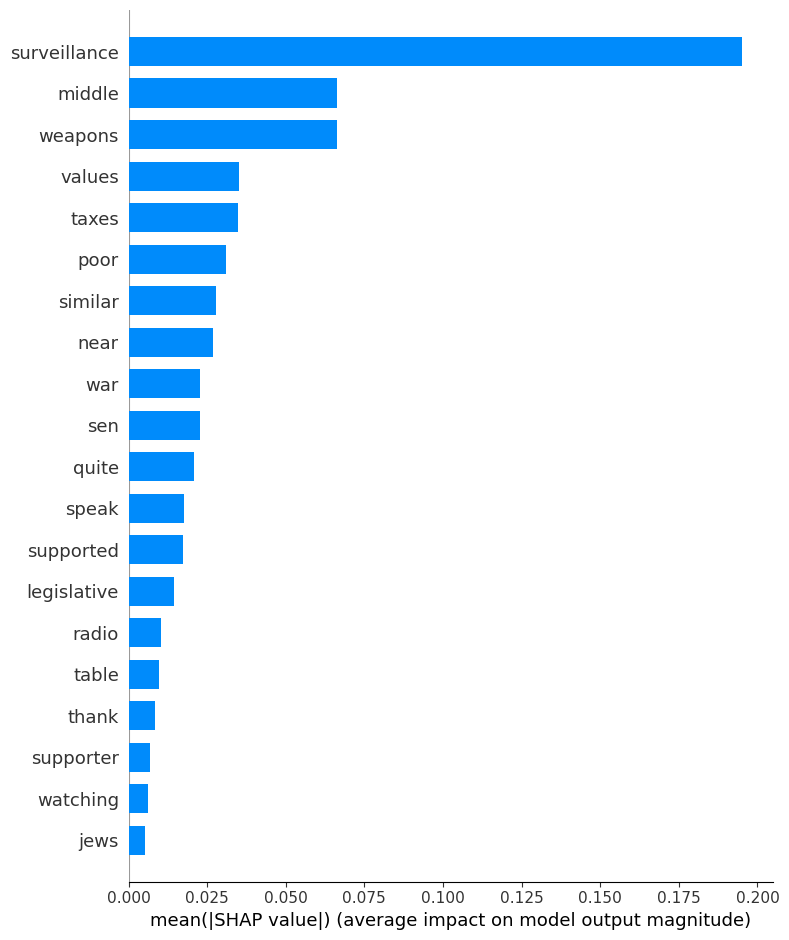

In [43]:
#Summary bar plot
shap.summary_plot(
    shap_values_xgb,
    X_test,
    feature_names=feature_names,
    plot_type="bar",
    max_display=20
)

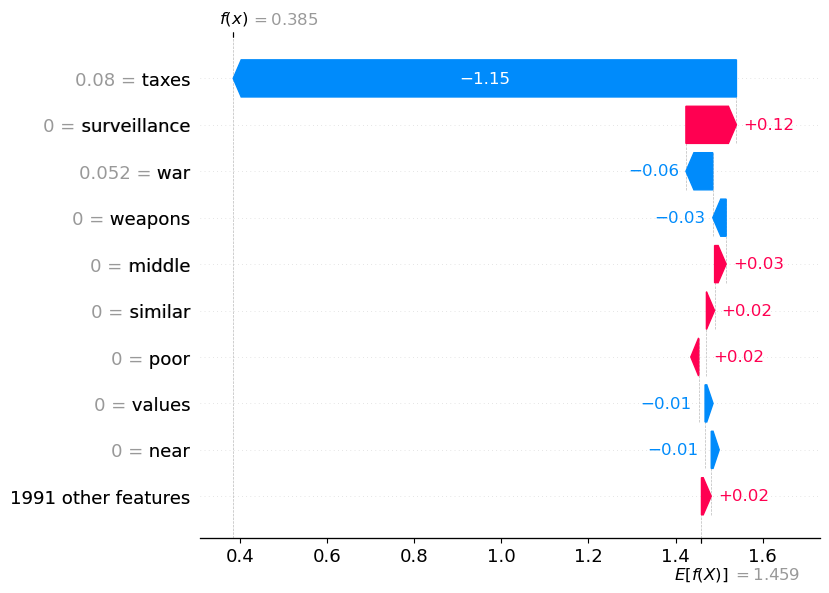

In [44]:
#4 — Waterfall plot
idx = 10

shap.waterfall_plot(
    shap.Explanation(
        values=shap_values_xgb[idx],
        base_values=explainer_xgb.expected_value,
        data=X_test[idx],
        feature_names=feature_names
    )
)